# Kinetics I

In this Notebook, we will begin our discussion of kinetic analysis. Specifically, we will cover the nature of kinetic data obtained using a batch reactor, and we will work through the method of differential analysis applied to kinetic data obtained in a constant volume batch reactor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import ceil, floor

## Example Problem 01

The following reaction is carried out in a well-mixed, isothermal, constant volume batch reactor. The concentration of species $A$ and $B$ in the tank are initially $C_{A0} = 10 \mathrm{M}$ and $C_{B0} = 0 \mathrm{M}$ at $t = 0$. You may assume that the fluid inside of the reactor has constant density. 
			
$$A \longrightarrow B$$
			
We measure the concentration of species $A$ in this reactor, monitoring how it changes with time. The collected data are tabulated below. 

| time (s) | $C_A \ (\mathrm{mol \ L^{-1}})$ |  time (s)  | $C_A \ (\mathrm{mol \ L^{-1}})$ |
|:--------:|:-------------------------------:|:----------:|:-------------------------------:|
|0         | 10.0                            | 34         | 4.96                            |
|1         | 9.58                            | 55         | 4.10                            |
|2         | 9.21                            | 89         | 3.33                            |
|3         | 8.87                            | 144        | 2.68                            |
|5         | 8.30                            | 233        | 2.13                            | 
|8         | 7.62                            | 377        | 1.69                            |
|13        | 6.79                            | 610        | 1.34                            |
|21        | 5.88                            | 987        | 1.06                            |

You may assume that the rate law for this reaction follows basic, power law kinetics, i.e.:
 
$$r = k{C_A}^{\alpha}$$

where $\alpha$ is a presently unknown integer. Use the data in the above table to determine the reaction order, $\alpha$, and to estimate the rate constant, $k$, as precisely as possible. The data set is compiled in two arrays in the code cell below. 

```{important}
In this type of experment, we would generally start with a known quantity of total moles and a known concentration of reacting species, and we are usually pretty confident in these values. Then we allow time to proceed, and we measure the concentrations of reactants and products as a function of time. The latter are generally more noisy and uncertain because, unlike starting quantities, we have to rely on measurements using calibrated analytical equipment (e.g., NMR, Gas Chromatograph, FTIR, UV-VIs, etc.) to estimate concentrations as a function of time. This adds considerable imprecision to measured data as a function of time compared to the data available for the well-controlled system we create at $t = 0$.
```

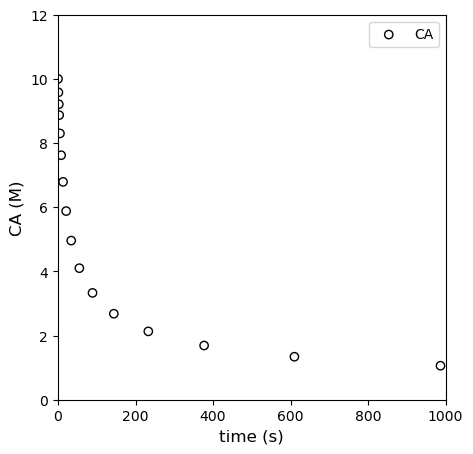

In [2]:
###################################################################################################
# Store experimental time and concentration data in separate arrays                               #
###################################################################################################

t  = np.array([0, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987])#, 1597, 4181, 6765, 10946]) #time in seconds
# CA = np.array([10.0000, 9.5783, 9.2057, 8.8736, 8.3045, 7.6249, 6.7884, 5.8824, 4.9629, 4.0996, 3.3315, 2.6764, 2.1335, 1.692, 1.3375, 1.0551])#, 0.8312, 0.5148, 0.4049, 0.3184])
CA = np.array([10.00, 9.58, 9.21, 8.87, 8.30, 7.62, 6.79, 5.88, 4.96, 4.10, 3.33, 2.68, 2.13, 1.69, 1.34, 1.06])#, 0.8312, 0.5148, 0.4049, 0.3184])
#Concentrations in moles per liter

###################################################################################################
# Graph experimental CA vs t data                                                                 #
###################################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(t, CA, edgecolor = 'black', color = 'none', label = 'CA')
plt.xlabel('time (s)', fontsize = 12)
plt.ylabel('CA (M)', fontsize = 12)
plt.xlim(0, 1000)
plt.ylim(0, 12)
plt.legend()
plt.show()

### Solution to Example Problem 01

This is our introduction to an inverse problem in kinetic analysis. Whereas we are used to solving problems that ask "how long do we need to let this reactor run to achieve a certain conversion," this problem involves determining the model and parameters that best describe the trends in data that we observe. To this point, we've only used models (material balances, rate laws, etc.) in order to predict data (e.g., reactor volume required for a certain conversion). Here, we have to work backwards and use data to develop the correct model. Extracting information from data can be challenging, but we'll work through a couple of methods. As we do so, we will highlight advantages and pitfalls associated with each one. This will help to build experience and awareness of strengths and weaknesses of each method available to us.

For the current problem, there is no reason to believe that the reaction is an elementary step, so, at best, we can propose that the rate of reaction depends on temperature (which we capture with a rate constant) and the concentration of the reactant, $A$. As given in the problem statement, we do not know the nature of the relationship between rate and concentration -- the reaction order in $A$ is currently unknown. At this point, a logical first step is to propose a power law model, where there are two unknown parameters, $(k, \alpha)$, that define precisely how reaction rate depends on :

$$r = k{C_A}^\alpha$$

Now we have to make some decisions about how we'll estimate those parameters $(k, \alpha)$. We have a rate law, but we do not yet have a model to apply to the data fitting exercise. We need to consider that the data available to us is a set of concentrations, $C_A$, measured as a function of time, i.e., we have $C_A$ vs. $t$ data. Our rate law tells us how $r$ varies as a function of $C_A$, not how $C_A$ varies as a function of $t$. This means that we can't apply the rate law directly for data fitting. We will begin by writing the material balance on species A in a constant volume batch reactor -- fundamentally, this is the equation that tells us how $C_A$ varies with $t$, so it is a natural starting point for modelling a set of $C_A$ vs. $t$ data.

$$\frac{dN_A}{dt} = R_AV$$

For a constant volume reactor, we can divide through by V and move it inside of the derivative:

$$\frac{dC_A}{dt} = R_A$$

Ffor a single reaction, we know that $R_A = -r$, so:

$$\frac{dC_A}{dt} = -r$$

We've proposed power law kinetics here -- now is the time where it is appropriate to use the rate law information. We substitute it into our material balance, which gives:

$$\frac{dC_A}{dt} = -k{C_A}^\alpha$$

Now we a general model that tells us, how $C_A$ will vary as a function of time (although at this point it is a differential equation, not a function per se), and we have options in how we move forward. Generally, with this time of problem, we choose one of two strategies to approach the problem. The first approach is called a ***differential*** method of analysis, wherein we attempt to approximate reaction rates by taking numerical derivatives of data. The second approach is an ***integral*** method of analysis, where we attempt to solve the differential equation to generate a function that describes how $C_A$ changes as a function of $t$. With that model in hand, we then find a way to regress parameters that minimize residual error. Generally, we will try to use both methods of batch reactor analysis because they each have advantages and disadvantages.


```{tip}
An ***integral method of analysis*** is easiest when we are able to assume a reaction order (1, 2, 3...). Once we do that, we know we can solve the differential equation analytically/symbolically in terms of $k$ and $C_{A0}$. The hard part about applying an integral method of analysis is that there is no guarantee that our reaction will be have integer order kinetics or even positive order kinetics with respect to a particular variable. It can therefore be tedious to test multiple reaction orders with an integral method of analysis. 

A ***differential method of analysis*** is fast to apply, and it lets us estimate reaction orders and rate constants ***without*** solving a differential equation. A major disadvantage of differential analysis is that it involves calculating numerical derivatives, which is usually very imprecise for noisy, real-world data. Differential analysis amplifies measurement noise, and it can be difficult to extract definitive, statistically significant estimates for rate constants and reaction orders using this method

The best approach is often to start with differential analysis to quickly develop a sense of likely reaction orders and then to use those insights to inform an integral analysis, where we only test reaction orders suggested by differential analysis. Whereas differential analysis amplifies noise, integral analysis smooths noise, and we can usually improve precision in parameter estimates by applying integral analysis.
```

#### A Differential Analysis of Batch Reactor Data

##### Finite Difference Methods

We'll start with a differential method of analysis. Differential analysis of batch reactor data is based on approximating the value of a derivative using finite difference methods. These are very straightforward despite a possibly unfamiliar name. The basic idea is that we assume that we can approximate a derivative from discrete data points from the changes in measured data (here, $C_A$) that are observed over a change in input variable (here, $t$):

$$\frac{dC_A}{dt} \approx \frac{\Delta C_A}{\Delta t}$$

This is convenient because, ***in a constant volume batch reactor***, we know the relationship between the time derivative of concentration and the reaction rate, namely:

$$\frac{dC_A}{dt} = -r$$

So, by approximating the time derivative of concentration in a constant volume batch reactor, we are actually generating an approximation of the reaction rate at a certain time and reactant concentration.

$$\frac{\Delta C_A}{\Delta t} \approx -r$$

Let's start by working with the notion that if we approximate derivatives using finite differences, we will get an estimate of reaction rates. There are several types of finite difference formulas that we can use. They differ in the location of where they assume the derivative is valid. Here, we will use a ***forward difference method***. The forward difference approximation says that we can estimate the derivative at point $n$ using data at point $n$ and the next data point at $n+1$. We call it a "forward difference" because it estimates the derivative at the current, $n^{th}$ state of the system using data at the ***current state of $n$*** and a ***future state of $n+1$***. As an equation, we would write this concept as:

$$\frac{dC_A}{dt}\bigg|_{C_{A_n}} \approx \frac{C_{A_{n+1}} - C_{A_{n}}}{t_{n+1} - t_n}$$

```{tip}
When we are working with large data arrays, and we need to efficiently calculate the differences between neighboring elements in an array, we can do so using `numpy.diff()`. It will take an $n$ element set of values and return the $n-1$ set of differences between those values.
```

In [3]:
ΔCA = np.diff(CA)
print(ΔCA, '\n')
Δt  = np.diff(t)
print(Δt, '\n')
r = -1*ΔCA/Δt
print(r)

[-0.42 -0.37 -0.34 -0.57 -0.68 -0.83 -0.91 -0.92 -0.86 -0.77 -0.65 -0.55
 -0.44 -0.35 -0.28] 

[  1   1   1   2   3   5   8  13  21  34  55  89 144 233 377] 

[0.42       0.37       0.34       0.285      0.22666667 0.166
 0.11375    0.07076923 0.04095238 0.02264706 0.01181818 0.00617978
 0.00305556 0.00150215 0.00074271]


As shown in the code cell above, `numpy.diff()` provides us with a quick and easy way to convert a concentration vs. time data set into an ***approximate*** (sometimes very approximate) set of reaction rates that we have inferred from changes in concentration measured over discrete changes in time. As indicated by our definition of the forward difference approximation, these entries represent the approximate time derivative of derivative at point "$n$", $\frac{dC_A}{dt}\bigg|_{C_{A_n}}$. This means that the first value in $r$ is the approximate rate of reaction at `t[0]` and `CA[0]`, the second value in $r$ is the approximate raction rate at `t[1]` and `CA[1]`, etc.  The only catch is that we have 20 measurements. We can only calculate 19 derivatives from 20 measurements using the forward difference formula. As a consequence, the final value in our rate array represents an estimate of the reaction rate at `CA[18]`, i.e., the 19th concentration measurement.

```{note}
In this case, we don't have an estimate for the rate at `CA[19]`, the 20th concentration measurement. This is because we are using a forward difference algorithm. Estimating the rate at the 20th concentration would require us to know the 21st concentration, which we didn't measure.
```

In [4]:
print(len(CA), '\n')
print(len(r))

16 

15


#### Visualizing rate as a function of CA

Remember: we have a model for how rate should vary with concentration:

$$r = k{C_A}^\alpha$$

The finite difference approximations allowed us to estimate reaction rate as a function of concentration, so let's plot $r$ against $C_A$ and see what it looks like. Remember: we can only generate 19 rate estimates from 20 concentration measurements at 20 different times. We need to consider the concentration value where the estimate of reaction rate applies. For this analysis, we used a forward difference approximation, which says that the rate is estimated at ${C_A}_n$, so we'll plot our rate measurements against the first 19 concentrations. The figure below shows us that rate increases with concentration, which we might generally anticipate. We cannot really determine a reaction order by looking at the data, but we can confidently say that the rate of reaction is positive order in $A$.

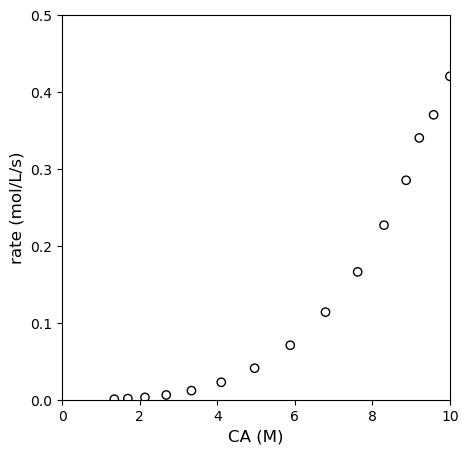

In [5]:
###############################################################################
# Extract the concentration values where we have estimated the reaction rate  #
###############################################################################

Cmod = CA[:-1] #keep all but last CA entry

###############################################################################
# Graph rate vs. CA                                                           #
###############################################################################

plt.figure(figsize = (5, 5))
plt.scatter(Cmod, r, edgecolor = 'black', color = 'none')
plt.xlabel('CA (M)', fontsize = 12)
plt.ylabel('rate (mol/L/s)', fontsize = 12)
plt.xlim(0, 10)
plt.ylim(0, 0.5)
plt.show()

#### Attempting a Linearization of $r$ vs. CA 

We know that the rate of this reaction is positive order in $A$...but it is hard for us to determine the order with any quantitative precision. There are many ways that we might approach this challenge. We'll start with one strategy that most of us are already familiar with -- we will attempt to linearize the data using any mathematical transformation(s) that are appropriate. Linearization is a powerful tool because it is relatively easy to assess linearity and deviations therefrom -- when a linearization is successful, it gives us confidence that the model we have proposed is applicable.  Moreover, we can apply the tools of linear regression to estimate parameters, which provide additional information about our model.

In this case, the data we have available is a set of reaction rates estimated at a set of $C_A$ values. We then need a model that describes how rate of reaction varies with concentration. Here, we have proposed a power law model:

$$r = k{C_A}^\alpha$$

We can linearize a power law model by taking logarithms of each side. You can use any base that you like for this, but the two most common are base $e$ logarithms (`np.log()`) and base $10$ logarithms (`np.log10()`). There is no real advantage to one or the other in this particular problems, so we could pick either to linearize the rate law. For example, if we take the natural logarithm of each side of the rate law, we get the following result:

$$\ln{r} = \alpha\ln{C_A} + \ln{k}$$

It may not look like it at first glance, but this is a standard $y = mx + b$ function, where $y = \ln(r)$ and $x = \ln(C_A)$. If this reaction rate truly follows power law kinetics, we should see a straight line when we plot $\ln{r}$ on the y-axis against $\ln{C_A}$ on the x-axis. Further, we can see that the slope of this line is equal to the reaction order $\alpha$, and the y-intercept is equal to $\ln(k)$. 

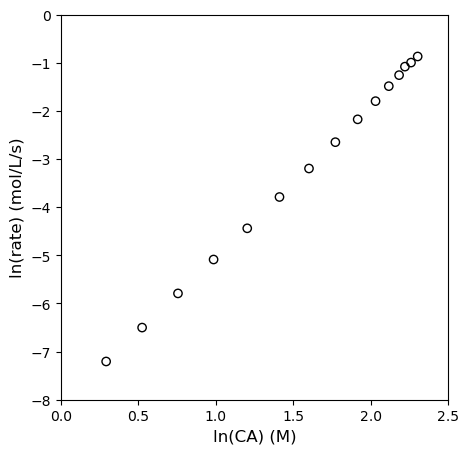

In [6]:
######################################################################################
# Graph ln(r) vs. ln(CA), assess linearity                                           #
######################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(np.log(Cmod), np.log(r), edgecolor = 'black', color = 'none')
plt.xlim(0, 2.5)
plt.ylim(-8, 0)
plt.xlabel('ln(CA) (M)', fontsize = 12)
plt.ylabel('ln(rate) (mol/L/s)', fontsize = 12)
plt.show()

#### Assessing linearity; linear regression

Is that trend truly linear? It looks like it, which gives some confidence that power law kinetics are applicable. We cannot be very quantitative with a visual assessment, so now is a good time to perform a regression analysis using that first order model. We can leverage the concepts from [Notebook 37](https://jqbond.github.io/CEN587/Notebooks/587-N37.html) and [Notebook 38](https://jqbond.github.io/CEN587/Notebooks/587-N38.html) to generate the line of best fit as well as several useful quantiative metrics that allow us to determine goodness of fit. Moreover, by performing a regerssion analysis, we will generate estimates for the slope and y-intercept, which will help us to determine the reaction order. 

There are 19 $(\ln(C_A), \ln(r))$ pairs, and we want to find a straight line that describes the trend in data. Because there are 19 data points, we cannot find a single line that goes through all of them -- the system is overdetermined. We can, however, regress the straight line that best describes the data using least squares regression. Here, we can follow the approaches outlined for linear regression and create a Vandermonde matrix (truncated to $x^1$). Thereafter, we can solve the least squares problem using linear algebra. Alternatively, we could use `np.polyfit()` or `np.linalg.lstsq()`. Each of these uses identical methods and will give the exact same slope and intercept values. 

Since we have developed it already in this course, let's leverage the code block from [Notebook 38](https://jqbond.github.io/CEN587/Notebooks/587-N38.html).

```{caution}
The code block below is ***mostly*** the same as the version that appeared in [Notebook 38](https://jqbond.github.io/CEN587/Notebooks/587-N38.html), but it is not exactly the same. Each time we want to use this linear regression code block, we will need to adapt it for the specific x and y data sets and the specific polynomial order that we wish to apply for a given data fit.
```

m    = 3.1674 +/- 0.0446
b    = -8.1980 +/- 0.0758
SSE  = 0.0352
SST  = 63.9411
MSE  = 0.0023
RMSE = 0.0485
R2   = 0.9994
α    = 3.1674
k    = 2.7520E-04


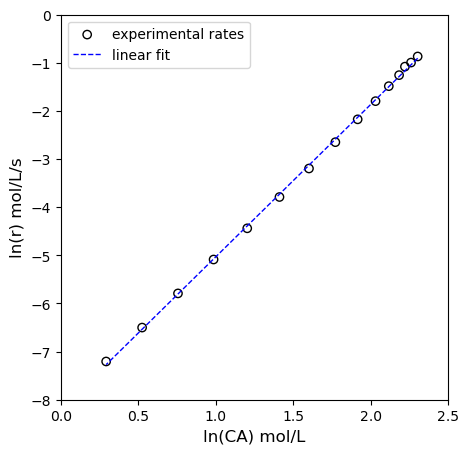

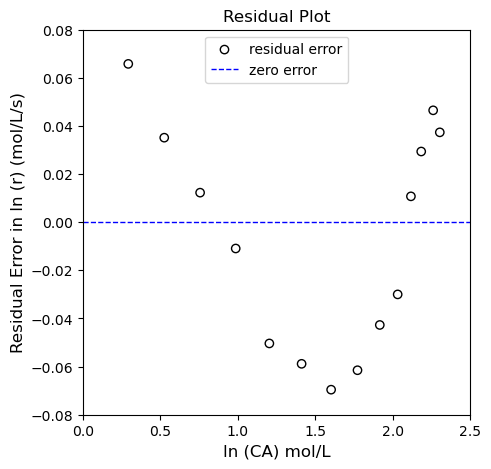

In [7]:
#####################################################################################################
# Define the xdata array and ydata array                                                            #
#####################################################################################################

ydata = np.log(r)
xdata = np.log(CA[:-1])

#####################################################################################################
# Define the X matrix and Y array                                                                   #
#####################################################################################################

Y     = ydata
X     = np.vander(xdata,2) #This creates the X matrix shown above, truncating at 1st order

#####################################################################################################
# Solve the least squares problem to find the best fit coefficients                                 #
#####################################################################################################

A      = np.linalg.solve(X.T@X, X.T@Y) 

#####################################################################################################
# Workup and analysis for quantifying and visualizing goodness of fit                               #
#####################################################################################################

Ypred  = X@A                          #Calculate discrete array of predicted y values at each x value
Ybar   = np.mean(ydata)               #Calculate the mean of the measured y values, use for SST calculation
Ndata  = len(ydata)                   #Calculate the number of data points/measurementws
SSE1   = np.sum((Y - Ypred)**2)       #Calculate residual sum of squares using intuitive summation formula
SSE2   = (Y - X@A).T@(Y - X@A)        #Calculate residual sum of squares using matrix multiplication; equivalent to SSE1
SST    = np.sum((Y - Ybar)**2)        #Calculate total sum of squares; assumes model is just y_pred = mean(ydata)
MSE    = SSE1/Ndata                   #Calculate mean square error
RMSE   = np.sqrt(MSE)                 #Calculate root mean square error
R2     = 1 - SSE1/SST                 #Calculate R2 (coefficient of determination)
DOF    = len(ydata) - len(A)          #Count degrees of freedom
s2     = SSE1/DOF                     #Estimate variance
COV    = s2*np.linalg.inv(X.T@X)      #Generate the covariance matrix for this fit
m      = A[0]                         #This is a linear model; with the way we define the X matrix, slope is A[0], intercept is A[1]
b      = A[1]                         #This is a linear model; with the way we define the X matrix, slope is A[0], intercept is A[1] 
SEm    = np.sqrt(COV[0, 0])           #For our definition of the X matrix, standard error in the slope is the first diagonal element in COV
SEb    = np.sqrt(COV[1, 1])           #For our definition of the X matrix, standard error in the intercept is the second diagonal element in COV
tval   = stats.t.ppf(0.975, DOF)      #t distribution for 95% confidence interval t(1 - α/2, DOF), α = 0.05 for 95% confidence interval
CIm    = SEm*tval                     #confidence interval on slope
CIb    = SEb*tval                     #confidence interval on intercept
α     = m                             #slope is equal to the reaction order
k     = np.exp(b)                     #y intercept is equal to ln(k)

############################################################################################
# Printing results using f strings; create arrays of labels and values                     #
############################################################################################

labels = ['m', 'b', 'SSE', 'SST','MSE','RMSE', 'R2', 'α', 'k']
values = [m  ,  b ,  SSE1,  SST , MSE , RMSE ,  R2, α, k]

for label, value in zip(labels, values):
    if label == 'm':
        print(f'{label:4s} = {value:0.4f} +/- {CIm:0.4f}')
    elif label == 'b':
        print(f'{label:4s} = {value:0.4f} +/- {CIb:0.4f}')
    elif label == 'k':
        print(f'{label:4s} = {value:0.4E}')
    else:
        print(f'{label:4s} = {value:0.4f}')

############################################################################################
# Visualizing results; overlay data and regressed y(x)                                     #
############################################################################################

plt.figure(1, figsize = (5, 5))
plt.scatter(xdata, ydata, marker = 'o', color = 'none', edgecolor = 'black', label = 'experimental rates')
plt.plot(xdata, Ypred, color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'linear fit')
plt.xlim(0, 2.5)
plt.ylim(-8, 0)
plt.xlabel('ln(CA) mol/L', fontsize = 12)
plt.ylabel('ln(r) mol/L/s', fontsize = 12)
plt.legend()
plt.show()

############################################################################################
# Visualizing results; plot of residual errors                                             #
############################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(xdata, (Y - Ypred), marker = 'o', color = 'none', edgecolor = 'black', label = 'residual error')
plt.hlines(0, floor(min(X[:, 0])), ceil(max(X[:,0])), color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'zero error')
plt.xlim(0, 2.5)
plt.ylim(-0.08, 0.08)
plt.xlabel('ln (CA) mol/L', fontsize = 12)
plt.ylabel('Residual Error in ln (r) (mol/L/s)', fontsize = 12)
plt.title('Residual Plot')
plt.legend(loc = 'upper center')
plt.show()

OK, from the above, we can see visually that there is a linear relationship between $\ln(r)$ and $\ln(C_A)$. We also see that the coefficient of determination is very close to 1 $(R^2 = 0.9994)$. Although this metric alone is not sufficient to conclude that our model is correct, we can be reasonably confident that a power law rate expression is valid here. Next, we can consider the slope and intercept, which provide information about the reaction order and rate constant, respectively.

In [8]:
α     = m
k     = np.exp(b)
print(f'From the slope, we determine that the reaction order is α = {α:3.2f}') 
print(f'From the y-intercept, we determine that k = {k:3.2E} in as yet unspecified units') 

From the slope, we determine that the reaction order is α = 3.17
From the y-intercept, we determine that k = 2.75E-04 in as yet unspecified units


According to our analysis so far, we would conclude that this is a 3.17 order reaction and that the rate constant is $2.75 \times 10^{-4}$...in whatever units correspond to a 3.17 order reaction. These estimates are not bad per se, but they are not exactly correct either. Non-integer orders are possible, but they might also raise suspicion as to why the reaction has a strange, non-integer order. Now is a good time to reveal that the data we are fitting was generated artificially by simulating the concentration of species $A$ in a constant volume batch reactor with the following parameters:

\begin{align*}
    r & = k{C_A}^3 \\
    k &= 4.5 \times 10^{-4} \ \mathrm{L^{2} \ mol^{-2} \ s^{-1}} \\
    C_{A0} &= 10 \ \mathrm{mol \ L^{-1}} \\
\end{align*}

In other words, the data was generated by simulating a third order (integer order) reaction, so it seems problematic that we're getting 3.17 order from the differential analysis. This is actually a common, anticipated problem when using differential analysis, and the data here was selected to highlight it. The fundamental problem is that we are treating our rates as if we actually measured them, but remember: we estimated them using a finite difference method (similar to an Euler step...):

$$r|_{C_{A_n}} = \frac{dC_A}{dt}\bigg|_{C_{A_n}} \approx \frac{C_{A_{n+1}} - C_{A_{n}}}{t_{n+1} - t_n}$$

This approximation tacitly assumes that the derivative of concentration with respect to time is constant between $t_n$ and $t_{n+1}$. This ***can be*** a pretty good approximation if we consider small changes in time and concentration, but it can also be pretty bad if we assume it is true over large changes in time and/or concentration. 

```{tip}
A differential method of analysis will add noise to the data and decrease the precision in parameter estimates. It is fast to apply, but we should be mindful that the results may be difficult to interpret, especially in cases of noisy data.
```